# **Problem Set 1**
## BUSN 33520-81
## Om Mehta

### a)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('data.xlsx', sheet_name='Sheet1').dropna()
ki_df = df.pivot(index="year", columns="isocode", values="ki")
rgdpwok_df = df.pivot(index="year", columns="isocode", values="rgdpwok")

In [10]:
ki_df = ki_df.dropna(axis=1)

In [11]:
rgdpwok_df = np.log(rgdpwok_df.dropna(axis=1))

In [12]:
df_2003 = pd.DataFrame({'KI':ki_df.loc[2003], 'log_GDP':rgdpwok_df.loc[2003]})

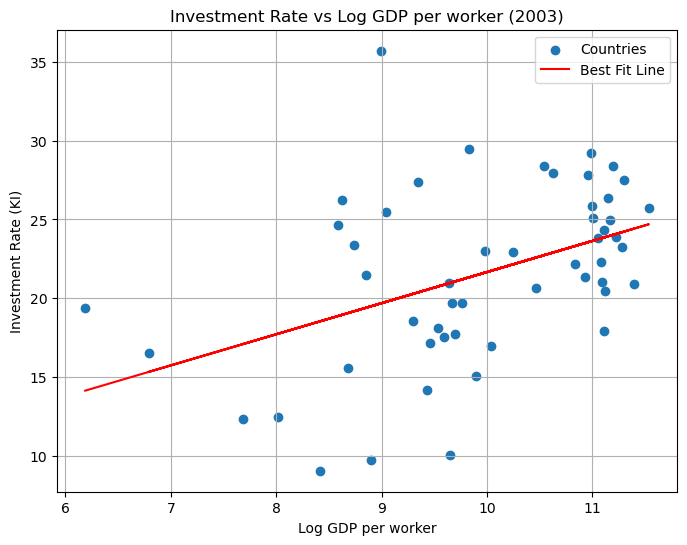

In [13]:
import numpy as np

# Fit a line
m, b = np.polyfit(df_2003['log_GDP'], df_2003['KI'], 1)

plt.figure(figsize=(8, 6))
plt.scatter(df_2003['log_GDP'], df_2003['KI'], label='Countries')
plt.plot(df_2003['log_GDP'], m * df_2003['log_GDP'] + b, color='red', label='Best Fit Line')
plt.xlabel('Log GDP per worker')
plt.ylabel('Investment Rate (KI)')
plt.title('Investment Rate vs Log GDP per worker (2003)')
plt.legend()
plt.grid(True)
plt.show()

## Based on this plot and the best fit line, we can say that richer countries tend to have higher investment rates. 

### b)

### Using the equation:
$$
\large
\frac{Y}{K} = \frac{g+\delta}{i}
$$

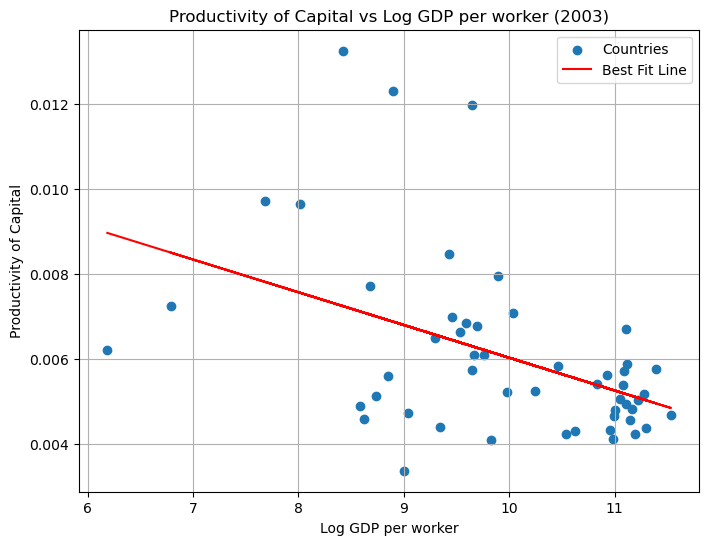

In [14]:
g = 0.02
delta = 0.1
df_2003['productivity'] = (g+delta)/df_2003['KI']
# Fit a line
m, b = np.polyfit(df_2003['log_GDP'], df_2003['productivity'], 1)

plt.figure(figsize=(8, 6))
plt.scatter(df_2003['log_GDP'], df_2003['productivity'], label='Countries')
plt.plot(df_2003['log_GDP'], m * df_2003['log_GDP'] + b, color='red', label='Best Fit Line')
plt.xlabel('Log GDP per worker')
plt.ylabel('Productivity of Capital')
plt.title('Productivity of Capital vs Log GDP per worker (2003)')
plt.legend()
plt.grid(True)
plt.show()

### This plot shows that the productivity of capital decreases as countries get richer, which also makes sense. This is because in the beginning, small amounts of investment yield large outputs, but as those outputs get used up, it becomes more and more challenging to get the same amount of output per unit investment.

### c)

### Deriving the breakdown of total factor productivity, $ A $, from the original equation:

$$
\large
\begin{aligned}
Y &= AK^\alpha L^{1-\alpha} \\
\frac{Y}{L} &= A \left(\frac{K}{L} \right)^\alpha \\
A &= \left( \frac{Y}{L} \right) \left( \frac{K}{L} \right)^{-\alpha}
\end{aligned}
$$

### using some algebra:

$$
\large
\begin{aligned}
\frac{Y}{K} &= \frac{Y}{K} \left( \frac{L}{L} \right)
\Rightarrow \frac{K}{L} = \frac{Y/L}{Y/K} \\
\text{Back to our equation for } A: \quad
A &= \frac{Y}{L} \left( \frac{Y/L}{Y/K} \right
)^{-\alpha}
= \left( \frac{Y}{L} \right)^{1-\alpha} \left( \frac{Y}{K} \right)^\alpha
\end{aligned}
$$


This equation shows that total factor productivity, $ A $, is a function of both labor and capital productivity, weighted by $\alpha$. While part b) suggests poor countries may have high $\frac{Y}{K}$, this is often due to low initial capital—meaning $ Y $ starts high in proportion. However, as capital accumulates, the return (and hence $\frac{Y}{K}$ diminishes, and unless labor productivity improves, TFP stays low. This supports the McKinsey view that TFP—not just capital intensity—drives sustained output differences.

### e)

Let's again take the original equation

$$
\large
\begin{aligned}
Y &= AK^\alpha L^{1-\alpha} \\
\end{aligned}
$$

and take a partial derivative of $Y$ with respect to $K$, basically answering the question "how much does output change given a 1 unit change in capital?"

$$
\large
\begin{aligned}
\frac{\Delta Y}{\Delta K} = A \alpha K^{\alpha - 1} L^{1-\alpha} \\
=\frac{\alpha A}{(K/L)^{1 - \alpha}} \\
\Rightarrow \left( \frac{K}{L} \right) = \left( \frac{\alpha A}{R} \right)^{\frac{1}{1-\alpha}} \\
\Rightarrow R = \alpha \left(\frac{Y}{K} \right) \\
\Rightarrow \frac{R}{\alpha} = \frac{Y}{K}
\end{aligned}
$$

Intuitively, $ \alpha $ is the "tuning parameter" that tells us how much of output is driven by capital. The left-hand side of the equation, $ \frac{R}{\alpha} $, tells us how much return we're getting per unit of capital, adjusted by how important capital is in production. The right-hand side, $ \frac{Y}{K} $, represents how much output each unit of capital generates — or, in economic terms, the productivity of capital. These two perspectives are conceptually equivalent, which is why the expression holds: $ \frac{R}{\alpha} = \frac{Y}{K} $.

### f)

When we are given a cost of capital of $9.1\%$ in the US, this also means the return on capital is $9.1\%$, as we learned in class that profit-maximizing equilibrium is when return=cost. So, 
$$
\large
\begin{aligned}
R_{GER} = 0.091 * 0.65 = 5.92\% \\
R_{JPN} = 0.091 * 0.65 = 5.73\%
\end{aligned}
$$

### g)

If capital is more productive (i.e. if $\frac{Y}{K}$ is higher), then you need less capital per worker to produce a given level of output. So $\frac{K}{L}$ has an inverse relationship with $\frac{Y}{K}$. So, since capital productivity is $65\%$ for Germany and $63\%$ for Japan (of the US, respectively), we can find their $\frac{K}{L}$:

To quantify "by how much", we use the relationship derived in part e):

$$
\frac{K}{L} = \left( \frac{1}{Y/K} \right)^{\frac{1}{1 - \alpha}}
$$

Assuming $\alpha = \frac{1}{3}$, we have:

$$
\frac{1}{1 - \alpha} = \frac{1}{2/3} = \frac{3}{2}
$$

**For Germany** ($Y/K$ is 65% of the US):

$$
\frac{K}{L}_{GER} = \left( \frac{100}{65} \right)^{3/2} \approx (1.538)^{1.5} \approx 1.90
$$

So $K/L$ in Germany would be about **90% higher** than in the US.

**For Japan** ($Y/K$ is 63% of the US):

$$
\frac{K}{L}_{JPN} = \left( \frac{100}{63} \right)^{3/2} \approx (1.587)^{1.5} \approx 2.00
$$

So $K/L$ in Japan would be about **100% higher** than in the US.

### h)

#### h) Why does lower capital productivity (Y/K) lead to higher output per worker (Y/L)?

Lower $Y/K$ in Japan and Germany increases output per worker because, under the assumption that total factor productivity $A$ is constant, the economy must compensate for lower capital productivity by having higher labor productivity. Mathematically, this comes from the expression:

$$
A = \left( \frac{Y}{L} \right)^{1 - \alpha} \left( \frac{Y}{K} \right)^\alpha
$$

Solving for $Y/L$:

$$
\frac{Y}{L} = A^{\frac{1}{1 - \alpha}} \left( \frac{Y}{K} \right)^{\frac{-\alpha}{1 - \alpha}}
$$

Since $A$ is constant across countries, we can compute relative $Y/L$ using just the $Y/K$ ratios and assume $A = 1$ for simplicity.

Assume $\alpha = \frac{1}{3}$ so that $\frac{\alpha}{1 - \alpha} = \frac{1}{2}$:

**Germany:**
$$
\frac{Y}{L}_{GER} = \left( \frac{100}{65} \right)^{1/2} \approx \sqrt{1.538} \approx 1.24
$$

**Japan:**
$$
\frac{Y}{L}_{JPN} = \left( \frac{100}{63} \right)^{1/2} \approx \sqrt{1.587} \approx 1.26
$$

#### Conclusion:
If the only thing that differs between the countries is $Y/K$, then **Germany’s output per worker is ~24% higher**, and **Japan’s is ~26% higher** than the U.S.

### i)

The McKinsey article claims that lower capital productivity ($Y/K$) in Japan and Germany causes lower output per worker ($Y/L$). But in part h), we showed that if total factor productivity ($A$) is constant, then a lower $Y/K$ actually leads to a higher $Y/L$ — because output must be made up elsewhere, and in this case it comes from labor productivity. Mathematically, we derived:

$$
\frac{Y}{L} =\left( \frac{1}{Y/K} \right)^{\frac{\alpha}{1 - \alpha}}
$$

This means that $Y/L$ increases when $Y/K$ decreases (as long as $A$ is constant). So McKinsey’s conclusion is **exactly the opposite** of what the math shows: lower $Y/K$ doesn't reduce $Y/L$ — it actually **raises** it. Therefore, their claim that capital productivity explains lower output per worker is flawed under the assumption that $A$ is the same across countries.

### j)

The assumption under which McKinsey's intuition is correct would be that "productivity" of a country doesn't include labor productivity but rather solely capital productivity. Mathematically speaking, the assumption that $\alpha=1$, that a country's full energy is being put towards capital productivity. This would mean that output is directly a function of capital productivity, and that labor productivity shouldn't be a factor.